   CustomerID  Age  Gender  Tenure  Usage Frequency  Support Calls  \
0           1   22  Female      25               14              4   
1           2   41  Female      28               28              7   
2           3   47    Male      27               10              2   
3           4   35    Male       9               12              5   
4           5   53  Female      58               24              9   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0             27             Basic         Monthly          598   
1             13          Standard         Monthly          584   
2             29           Premium          Annual          757   
3             17           Premium       Quarterly          232   
4              2          Standard          Annual          533   

   Last Interaction  Churn  
0                 9      1  
1                20      0  
2                21      0  
3                18      0  
4                18      0  

C

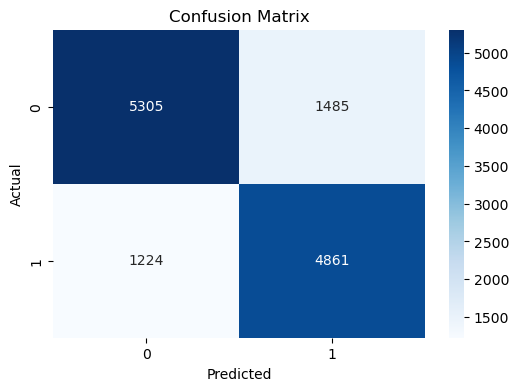

In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
customers = pd.read_csv(r"C:\Users\Parthiban\Documents\Model lab\DVA\customer_churn_dataset-testing-master.csv")

# Display initial info
print(customers.head())
print("\nColumns:", customers.columns.tolist())

# Select features and target variable
X = customers[['Age', 'Tenure', 'Usage Frequency', 'Payment Delay', 'Total Spend', 'Last Interaction']]
y = customers['Churn']

print("\nFeatures:\n", X.head())
print("\nTarget (Churn):\n", y.head())

# Scale the features
scaler = StandardScaler()
X_transformed = scaler.fit_transform(X)

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.20, random_state=23)

# Train Logistic Regression model
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred) * 100

print(f"\n✅ Logistic Regression model accuracy: {acc:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix visualization
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
